In [1]:
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-labs/quinlan/data-shared/constraint-tools'

In [2]:
import polars as pl

def get_CDTS_windows_with_features():
    filename = f'{CONSTRAINT_TOOLS_DATA}/CDTS/CDTS.gnomAD.hg38.overlapAmounts.bed'
    return (pl
        .read_csv(filename, separator='\t')
        .select(pl.col('chrom', 'start', 'end', 'observed_counts', 'expected_counts', 'observed_minus_expected', 'percentile_rank_of_observed_minus_expected', 'feature', 'window_feature_overlap_bps'))
        .rename({
            'chrom': 'chromosome',
        })
        # .sample(1000000) # for testing
    )

CDTS_windows = get_CDTS_windows_with_features()
CDTS_windows

chromosome,start,end,observed_counts,expected_counts,observed_minus_expected,percentile_rank_of_observed_minus_expected,feature,window_feature_overlap_bps
str,i64,i64,i64,f64,f64,f64,str,i64
"""chr1""",47939,48490,2,10.319328,-8.31933,1.452103,""".""",0
"""chr1""",47949,48500,2,10.348492,-8.34849,1.432368,""".""",0
"""chr1""",47959,48510,2,10.348492,-8.34849,1.432368,""".""",0
"""chr1""",47999,48550,2,10.325869,-8.32587,1.447569,""".""",0
"""chr1""",58209,58760,7,8.179362,-1.17936,40.981373,"""merged_exon""",60
…,…,…,…,…,…,…,…,…
"""chr17""",58762584,58763135,16,16.767538,-0.767538,45.423107,""".""",0
"""chr17""",58762594,58763145,16,16.734729,-0.734729,45.776368,""".""",0
"""chr17""",58762604,58763155,16,16.730413,-0.730413,45.82294,""".""",0


## Create single record for each window, with overlap amounts for each feature type 

In [3]:
columns_to_group_by = [column for column in CDTS_windows.columns if column != 'window_feature_overlap_bps']
columns_to_group_by

['chromosome',
 'start',
 'end',
 'observed_counts',
 'expected_counts',
 'observed_minus_expected',
 'percentile_rank_of_observed_minus_expected',
 'feature']

In [4]:
CDTS_windows = ( 
    CDTS_windows
    .group_by(columns_to_group_by, maintain_order=True)
    .agg(pl.col("window_feature_overlap_bps").sum())
)
CDTS_windows

chromosome,start,end,observed_counts,expected_counts,observed_minus_expected,percentile_rank_of_observed_minus_expected,feature,window_feature_overlap_bps
str,i64,i64,i64,f64,f64,f64,str,i64
"""chr1""",47939,48490,2,10.319328,-8.31933,1.452103,""".""",0
"""chr1""",47949,48500,2,10.348492,-8.34849,1.432368,""".""",0
"""chr1""",47959,48510,2,10.348492,-8.34849,1.432368,""".""",0
"""chr1""",47999,48550,2,10.325869,-8.32587,1.447569,""".""",0
"""chr1""",58209,58760,7,8.179362,-1.17936,40.981373,"""merged_exon""",60
…,…,…,…,…,…,…,…,…
"""chr17""",58762584,58763135,16,16.767538,-0.767538,45.423107,""".""",0
"""chr17""",58762594,58763145,16,16.734729,-0.734729,45.776368,""".""",0
"""chr17""",58762604,58763155,16,16.730413,-0.730413,45.82294,""".""",0


In [5]:
pivot_index = [column for column in columns_to_group_by if column != 'feature']
pivot_index 

['chromosome',
 'start',
 'end',
 'observed_counts',
 'expected_counts',
 'observed_minus_expected',
 'percentile_rank_of_observed_minus_expected']

In [6]:
# pivoting is possible in SQL too, but it is clunky: https://www.databricks.com/blog/2018/11/01/sql-pivot-converting-rows-to-columns.html
CDTS_windows = (
    CDTS_windows
    .pivot(
        index = pivot_index, 
        columns = "feature", 
        values = "window_feature_overlap_bps"
    )
    .drop('.')
    .rename({
        'enhancer': 'enhancer_overlap',
        'merged_exon': 'merged_exon_overlap',
    })
)
CDTS_windows

chromosome,start,end,observed_counts,expected_counts,observed_minus_expected,percentile_rank_of_observed_minus_expected,merged_exon_overlap,enhancer_overlap
str,i64,i64,i64,f64,f64,f64,i64,i64
"""chr1""",47939,48490,2,10.319328,-8.31933,1.452103,null,null
"""chr1""",47949,48500,2,10.348492,-8.34849,1.432368,null,null
"""chr1""",47959,48510,2,10.348492,-8.34849,1.432368,null,null
"""chr1""",47999,48550,2,10.325869,-8.32587,1.447569,null,null
"""chr1""",58209,58760,7,8.179362,-1.17936,40.981373,60,null
…,…,…,…,…,…,…,…,…
"""chr17""",58762584,58763135,16,16.767538,-0.767538,45.423107,null,null
"""chr17""",58762594,58763145,16,16.734729,-0.734729,45.776368,null,null
"""chr17""",58762604,58763155,16,16.730413,-0.730413,45.82294,null,null


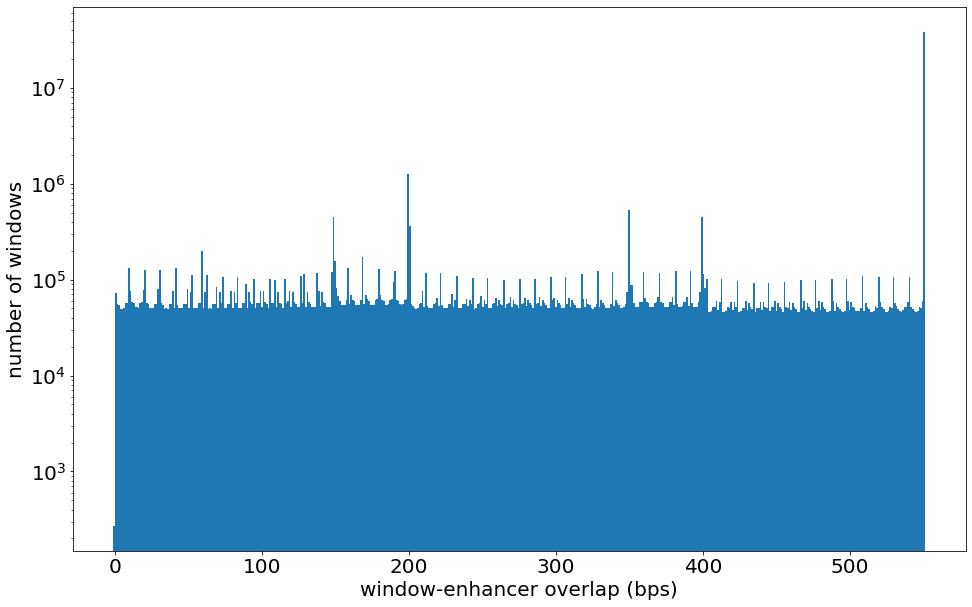

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20

def plot_distribution_of_overlap_amounts(df, feature): 
    plt.figure(figsize=(16, 10))  # Set the figure size
    data = df[f'{feature}_overlap']
    plt.hist(data, bins=500, log=True)
    plt.xlabel(f'window-{feature} overlap (bps)')
    plt.ylabel('number of windows')
    plt.show()
    
plot_distribution_of_overlap_amounts(CDTS_windows, feature='enhancer')

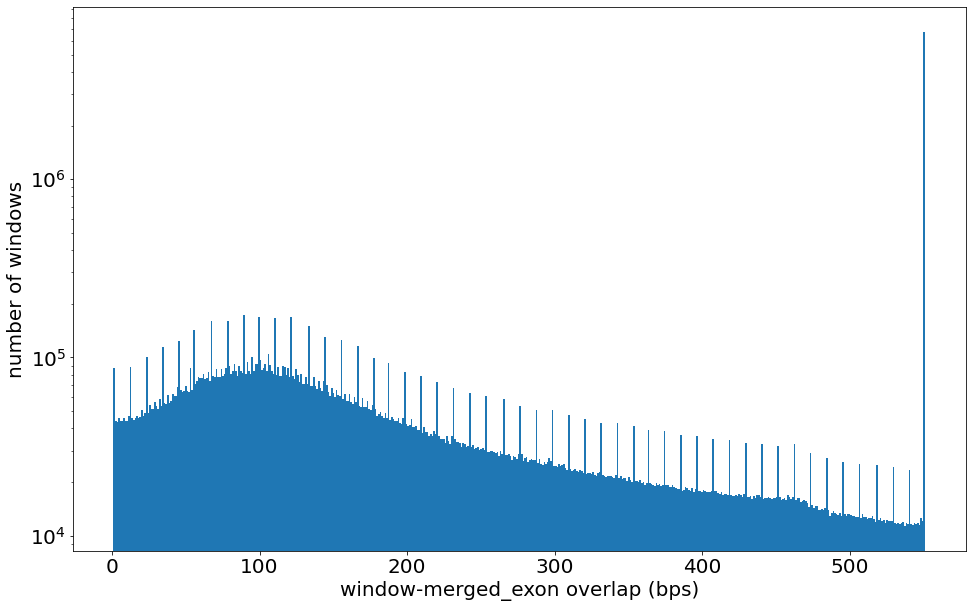

In [8]:
# Notice that the distribution is not uniform. 
# This is because exons are typically smaller than windows, 
# so that the overlap amounts reflect the exon sizes, 
# which are typically ~ 100bp 
plot_distribution_of_overlap_amounts(CDTS_windows, feature='merged_exon')

## Classify windows according to whether they appreciably overlap enhancers or exons 

In [9]:
def classify(df): 
    for feature, min_overlap in [
        ('enhancer', 250),
        ('merged_exon', 5),
    ]:
        df = df.with_columns(
            pl
            .when(pl.col(f'{feature}_overlap') >= min_overlap)
            .then(pl.lit("yes"))
            .when(pl.col(f'{feature}_overlap') < min_overlap)
            .then(pl.lit("ambiguous"))
            .otherwise(pl.lit("no"))
            .alias(f'window overlaps {feature}')
        )
    return df
    
CDTS_windows = classify(CDTS_windows)
CDTS_windows

chromosome,start,end,observed_counts,expected_counts,observed_minus_expected,percentile_rank_of_observed_minus_expected,merged_exon_overlap,enhancer_overlap,window overlaps enhancer,window overlaps merged_exon
str,i64,i64,i64,f64,f64,f64,i64,i64,str,str
"""chr1""",47939,48490,2,10.319328,-8.31933,1.452103,null,null,"""no""","""no"""
"""chr1""",47949,48500,2,10.348492,-8.34849,1.432368,null,null,"""no""","""no"""
"""chr1""",47959,48510,2,10.348492,-8.34849,1.432368,null,null,"""no""","""no"""
"""chr1""",47999,48550,2,10.325869,-8.32587,1.447569,null,null,"""no""","""no"""
"""chr1""",58209,58760,7,8.179362,-1.17936,40.981373,60,null,"""no""","""yes"""
…,…,…,…,…,…,…,…,…,…,…
"""chr17""",58762584,58763135,16,16.767538,-0.767538,45.423107,null,null,"""no""","""no"""
"""chr17""",58762594,58763145,16,16.734729,-0.734729,45.776368,null,null,"""no""","""no"""
"""chr17""",58762604,58763155,16,16.730413,-0.730413,45.82294,null,null,"""no""","""no"""


In [10]:
CDTS_windows['window overlaps enhancer'].value_counts()

window overlaps enhancer,count
str,u32
"""no""",176929251
"""ambiguous""",16697046
"""yes""",55237872


In [11]:
CDTS_windows['window overlaps merged_exon'].value_counts()

window overlaps merged_exon,count
str,u32
"""ambiguous""",174123
"""yes""",27080923
"""no""",221609123


In [12]:
def throw_out_ambiguous(df):
    df = df.filter(
        (pl.col('window overlaps enhancer') != 'ambiguous') & 
        (pl.col('window overlaps merged_exon') != 'ambiguous')
    )
    for feature in ['enhancer', 'merged_exon']:
        df = df.with_columns(pl
            .when(pl.col(f'window overlaps {feature}') == 'yes')
            .then(pl.lit(True))
            .otherwise(pl.lit(False))
            .alias(f'window overlaps {feature}')
        )
    return df

CDTS_windows = throw_out_ambiguous(CDTS_windows)
CDTS_windows

chromosome,start,end,observed_counts,expected_counts,observed_minus_expected,percentile_rank_of_observed_minus_expected,merged_exon_overlap,enhancer_overlap,window overlaps enhancer,window overlaps merged_exon
str,i64,i64,i64,f64,f64,f64,i64,i64,bool,bool
"""chr1""",47939,48490,2,10.319328,-8.31933,1.452103,null,null,false,false
"""chr1""",47949,48500,2,10.348492,-8.34849,1.432368,null,null,false,false
"""chr1""",47959,48510,2,10.348492,-8.34849,1.432368,null,null,false,false
"""chr1""",47999,48550,2,10.325869,-8.32587,1.447569,null,null,false,false
"""chr1""",58209,58760,7,8.179362,-1.17936,40.981373,60,null,false,true
…,…,…,…,…,…,…,…,…,…,…
"""chr17""",58762584,58763135,16,16.767538,-0.767538,45.423107,null,null,false,false
"""chr17""",58762594,58763145,16,16.734729,-0.734729,45.776368,null,null,false,false
"""chr17""",58762604,58763155,16,16.730413,-0.730413,45.82294,null,null,false,false


## Restrict to noncoding windows and save to disk 

In [13]:
(
    CDTS_windows
    .filter(pl.col('window overlaps merged_exon') == False)
    .drop('merged_exon_overlap')
    .drop('window overlaps merged_exon')
    .write_csv(
        f'{CONSTRAINT_TOOLS_DATA}/CDTS/CDTS.gnomAD.hg38.noncoding.enhancer.bed',
        separator='\t'
    )
)